University of Zagreb  
Faculty of Electrical Engineering and Computing 
  
## Machine Learning 1 2025/2026  
http://www.fer.unizg.hr/predmet/maclea1

------------------------------

### Third lab assignment: Support Vector Machine and Non-parametric Methods

*Version: 1.0 

(c) 2015-2026 Jan Šnajder, Domagoj Alagić

------------------------------

### Submission rules
By submitting the exercise, you confirm the following points:
1. You did not receive help from another when solving the exercise;
2. You attributed parts of the code that were taken from the Internet by referencing them in comments;
3. You did not use parts of the code from the Internet that are specific to the laboratory exercise;
4. You have not used UI-assistants for coding such as GitHub Copilot (including generative UI tools such as ChatGPT).

**Violation of any of the above rules is considered a misdemeanor and results in academic sanctions.**

### Instructions

Third lab assignment consists of eight tasks. Follow the instructions in the text cells below. Solving the lab assignment boils down to **supplementing this notebook**: inserting one or more cells **below** the text of the task, writing the appropriate code, and executing the cells.

Make sure you fully understand the code you've written. When submitting the assignment, you must be able to modify and re-execute your code at the request of the teaching assistant. Furthermore, you need to understand the theoretical basis of what you are doing, within the framework of what we covered in the lecture. Below some tasks you can also find questions that serve as guidelines for a better understanding of the material (**do not write** the answers to the questions in the notebook). Therefore, do not limit yourself only to solving the tasks, but feel free to experiment. This is precisely the purpose of these assignments.

You should do the assignment **independently**. You can consult others on the principle way of solving it, but ultimately you have to do the assignment yourself. Otherwise, the assignment makes no sense.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


def plot_2d_svc_problem(X, y, svc=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if SVC object is given, 
    the decision surfaces (with margin as well).
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if svc!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        Z = np.array([svc_predict(svc, x) for x in XX])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired, marker='o', s=50)

def svc_predict(svc, x) : 
    h = svc.decision_function([x])
    if np.isclose(h, 0, atol=0.03):
        return 5
    elif (h >= -1 and h < -0.03) or (h > 0.03 and h <= 1):
        return 0.5
    else: 
        #return max(-1, min(1, h))
        return 0
    
def plot_error_surface(err, c_range=(0,5), g_range=(0,5)):
    c1, c2 = c_range[0], c_range[1]
    g1, g2 = g_range[0], g_range[1]
    plt.xticks(range(0,g2-g1+1,5),range(g1,g2+1,5)); plt.xlabel("gamma")
    plt.yticks(range(0,c2-c1+1,5),range(c1,c2+1,5)); plt.ylabel("C")
    p = plt.contour(err);
    plt.imshow(1-err, interpolation='bilinear', origin='lower',cmap=plt.cm.gray)
    plt.clabel(p, inline=1, fontsize=10)

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);
    
def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, 
             test_size=0.3, k_range=(1, 20), n_trials=40):
    
    train_errors = []
    test_errors = []
    ks = list(range(k_range[0], k_range[1] + 1))

    for i in range(0, n_trials):
        X, y = make_classification(n_instances, n_features, n_classes=n_classes, 
                                   n_informative=n_informative, n_redundant=0, n_clusters_per_class=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        train = []
        test = []
        for k in ks:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            train.append(1 - knn.score(X_train, y_train))
            test.append(1 - knn.score(X_test, y_test))
        train_errors.append(train)
        test_errors.append(test)
        
    train_errors = np.mean(np.array(train_errors), axis=0)
    test_errors = np.mean(np.array(test_errors), axis=0)
    best_k = ks[np.argmin(test_errors)]
    
    return ks, best_k, train_errors, test_errors

### 1. Support Vector Machine classifier (SVM)

#### (a)

Familiarize yourself with the class [`svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), which implements an interface to the implementation of [`libsvm`](http ://www.csie.ntu.edu.tw/~cjlin/libsvm/). Train the `SVC` model with a linear kernel function (i.e., without mapping of examples to feature space) on the data set `seven` (given below) with $N=7$ examples. Print the coefficients $w_0$ and $\mathbf{w}$. Print the dual coefficients and support vectors. Finally, using the `plot_2d_svc_problem` function, plot the data, decision boundary and margin. The function accepts data, labels and a classifier (an object of class `SVC`) as arguments.

---

Upoznajte se s razredom [`svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), koja ustvari implementira sučelje prema implementaciji [`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/). Primijenite model `SVC` s linearnom jezgrenom funkcijom (tj. bez preslikavanja primjera u prostor značajki) na skup podataka `seven` (dan niže) s $N=7$ primjera. Ispišite koeficijente $w_0$ i $\mathbf{w}$. Ispišite dualne koeficijente i potporne vektore. Završno, koristeći funkciju `plot_2d_svc_problem` iscrtajte podatke, decizijsku granicu i marginu. Funkcija prima podatke, oznake i klasifikator (objekt klase `SVC`). 

In [9]:
from sklearn.svm import SVC

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1], dtype=int)

Coefficient w0 : [3.99951172]

w: [[-9.99707031e-01 -2.92968750e-04]]
duals coef: [[-4.99707031e-01 -1.46484375e-04  4.99853516e-01]]

support vectors:
[[5. 2.]
 [5. 4.]
 [3. 2.]]


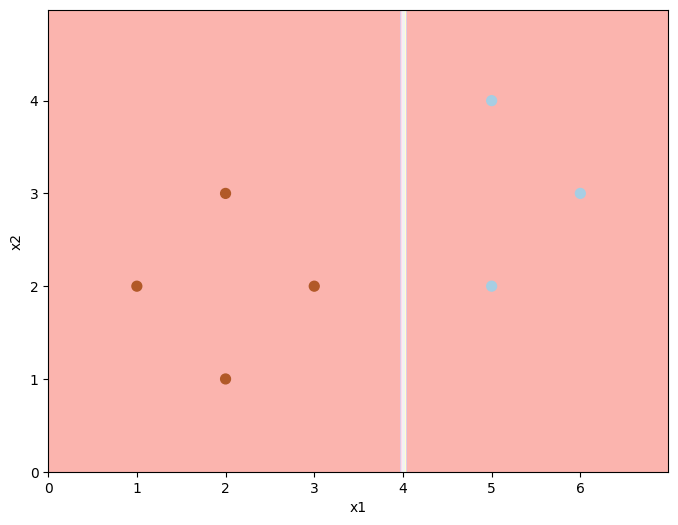

In [10]:
svc = SVC(kernel='linear').fit(seven_X, seven_y)

#w0 and w
print("Coefficient w0 :", svc.intercept_)
print("\nw:", svc.coef_)
#dual coef and sv
print("duals coef:", svc.dual_coef_)
print("\nsupport vectors:")
print(svc.support_vectors_)
#plot
plt.figure(figsize=(8, 6))
plot_2d_svc_problem(seven_X, seven_y, svc)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

**Q:** Which examples correspond to support vectors and why?

---

**Q:** Koji primjeri su potporni vektori i zašto?

#### (b)

Define a `hinge(model, x, y)` function that calculates the hinge loss of the SVM model on `x` instance. Calculate the losses of the model trained on set `seven` for the examples $\mathbf{x}^{(2)}=(3,2)$ and $\mathbf{x}^{(1)}=(3.5,2)$ which are labeled as positive ($y=1$) and for $\mathbf{x}^{(3)}=(4,2)$ which is labeled as negative ($y=-1$). Also, calculate the average loss of the SVM on the set `seven`. Make sure the result is identical to what you would get using the built-in function [`metrics.hinge_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html).

---

Definirajte funkciju `hinge(model, x, y)` koja izračunava gubitak zglobnice modela SVM na primjeru `x`. Izračunajte gubitke modela naučenog na skupu `seven` za primjere $\mathbf{x}^{(2)}=(3,2)$ i $\mathbf{x}^{(1)}=(3.5,2)$ koji su označeni pozitivno ($y=1$) te za $\mathbf{x}^{(3)}=(4,2)$ koji je označen negativno ($y=-1$). Također, izračunajte prosječni gubitak SVM-a na skupu `seven`. Uvjerite se da je rezultat identičan onome koji biste dobili primjenom ugrađene funkcije [`metrics.hinge_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html).

In [11]:
from sklearn.metrics import hinge_loss

seven_X = np.array([[3.5,2], [3,2], [4,2]])
seven_y = np.array([1, 1, -1], dtype=int)
svc = SVC(kernel='linear').fit(seven_X, seven_y)

def hinge(model, x, y):
    hX = svc.decision_function(seven_X)
    hingeloss = hinge_loss(seven_y, hX)
    print("hinge loss on dataset : ", hingeloss)

hinge(svc, seven_X, seven_y)

hinge loss on dataset :  0.5833333333333334


#### (c)

Now, we'll go back to the `outlier` ($N=8$) and `unsep` ($N=8$) datasets from the previous lab assignment (given below) and see how the SVM model handles them. Train a built-in SVM model (with a linear kernel) on this data and plot the decision boundary (together with the margin). Also print the accuracy of the model using the [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function.

---

Vratit ćemo se na skupove podataka `outlier` ($N=8$) i `unsep` ($N=8$) iz prošle laboratorijske vježbe (dani niže) i pogledati kako se model SVM-a nosi s njima. Naučite ugrađeni model SVM-a (s linearnom jezgrom) na ovim podatcima i iscrtajte decizijsku granicu (skupa s marginom). Također ispišite točnost modela korištenjem funkcije [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [12]:
from sklearn.metrics import accuracy_score

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1], dtype=int)

outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

svc1 = SVC(kernel='linear').fit(outlier_X, outlier_y)
svc2 = SVC(kernel='linear').fit(unsep_X, unsep_y)

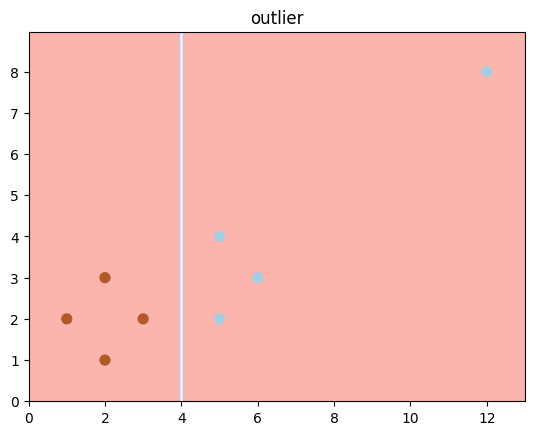

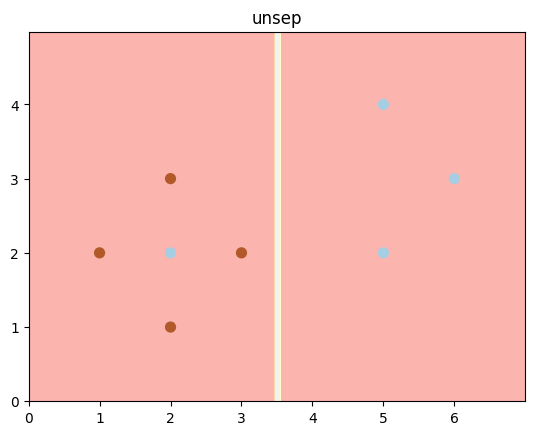

accuracy of outlier model : 1.0

accuracy of unsep model : 0.875


In [13]:
plot_2d_svc_problem(outlier_X, outlier_y,svc1)
plt.title("outlier")
plt.show()

plot_2d_svc_problem(unsep_X, unsep_y,svc2)
plt.title("unsep")
plt.show()

print("accuracy of outlier model :", accuracy_score(outlier_y, svc1.predict(outlier_X)))
print("\naccuracy of unsep model :", accuracy_score(unsep_y, svc2.predict(unsep_X)))

**Q:** How does an outlier affect SVM?  
**Q:** How does a linear SVM handle a linearly inseparable data set?

---

**Q:** Kako stršeća vrijednost utječe na SVM?  
**Q:** Kako se linearan SVM nosi s linearno neodvojivim skupom podataka?

### 2. Nonlinear SVM

This task will show how the choice of kernel affects the capacity of SVM. On the `unsep` set from the previous task, train three SVM models with different kernel functions: linear, polynomial, and radial basis function (RBF). Vary the hyperparameter $C$ by the values $C\in\{10^{-2},1,10^2\}$. For the other hyperparameters (the degree of the polynomial for the polynomial kernel and the hyperparameter $\gamma$ for the RBF kernel) use the default values. Plot the boundaries between classes (and the margins) on a graph organized in a $3x3$ grid, where the columns represent different kernels and the rows represent different values of the $C$ parameter.

---

Ovaj zadatak pokazat će kako odabir jezgre utječe na kapacitet SVM-a. Na skupu `unsep` iz prošlog zadatka trenirajte tri modela SVM-a s različitim jezgrenim funkcijama: linearnom, polinomijalnom i radijalnom baznom (RBF) funkcijom. Varirajte hiperparametar $C$ po vrijednostima $C\in\{10^{-2},1,10^2\}$, dok za ostale hiperparametre (stupanj polinoma za polinomijalnu jezgru odnosno hiperparametar $\gamma$ za jezgru RBF) koristite podrazumijevane vrijednosti. Prikažite granice između klasa (i margine) na grafikonu organiziranome u polje $3x3$, gdje su stupci različite jezgre, a retci različite vrijednosti parametra $C$.

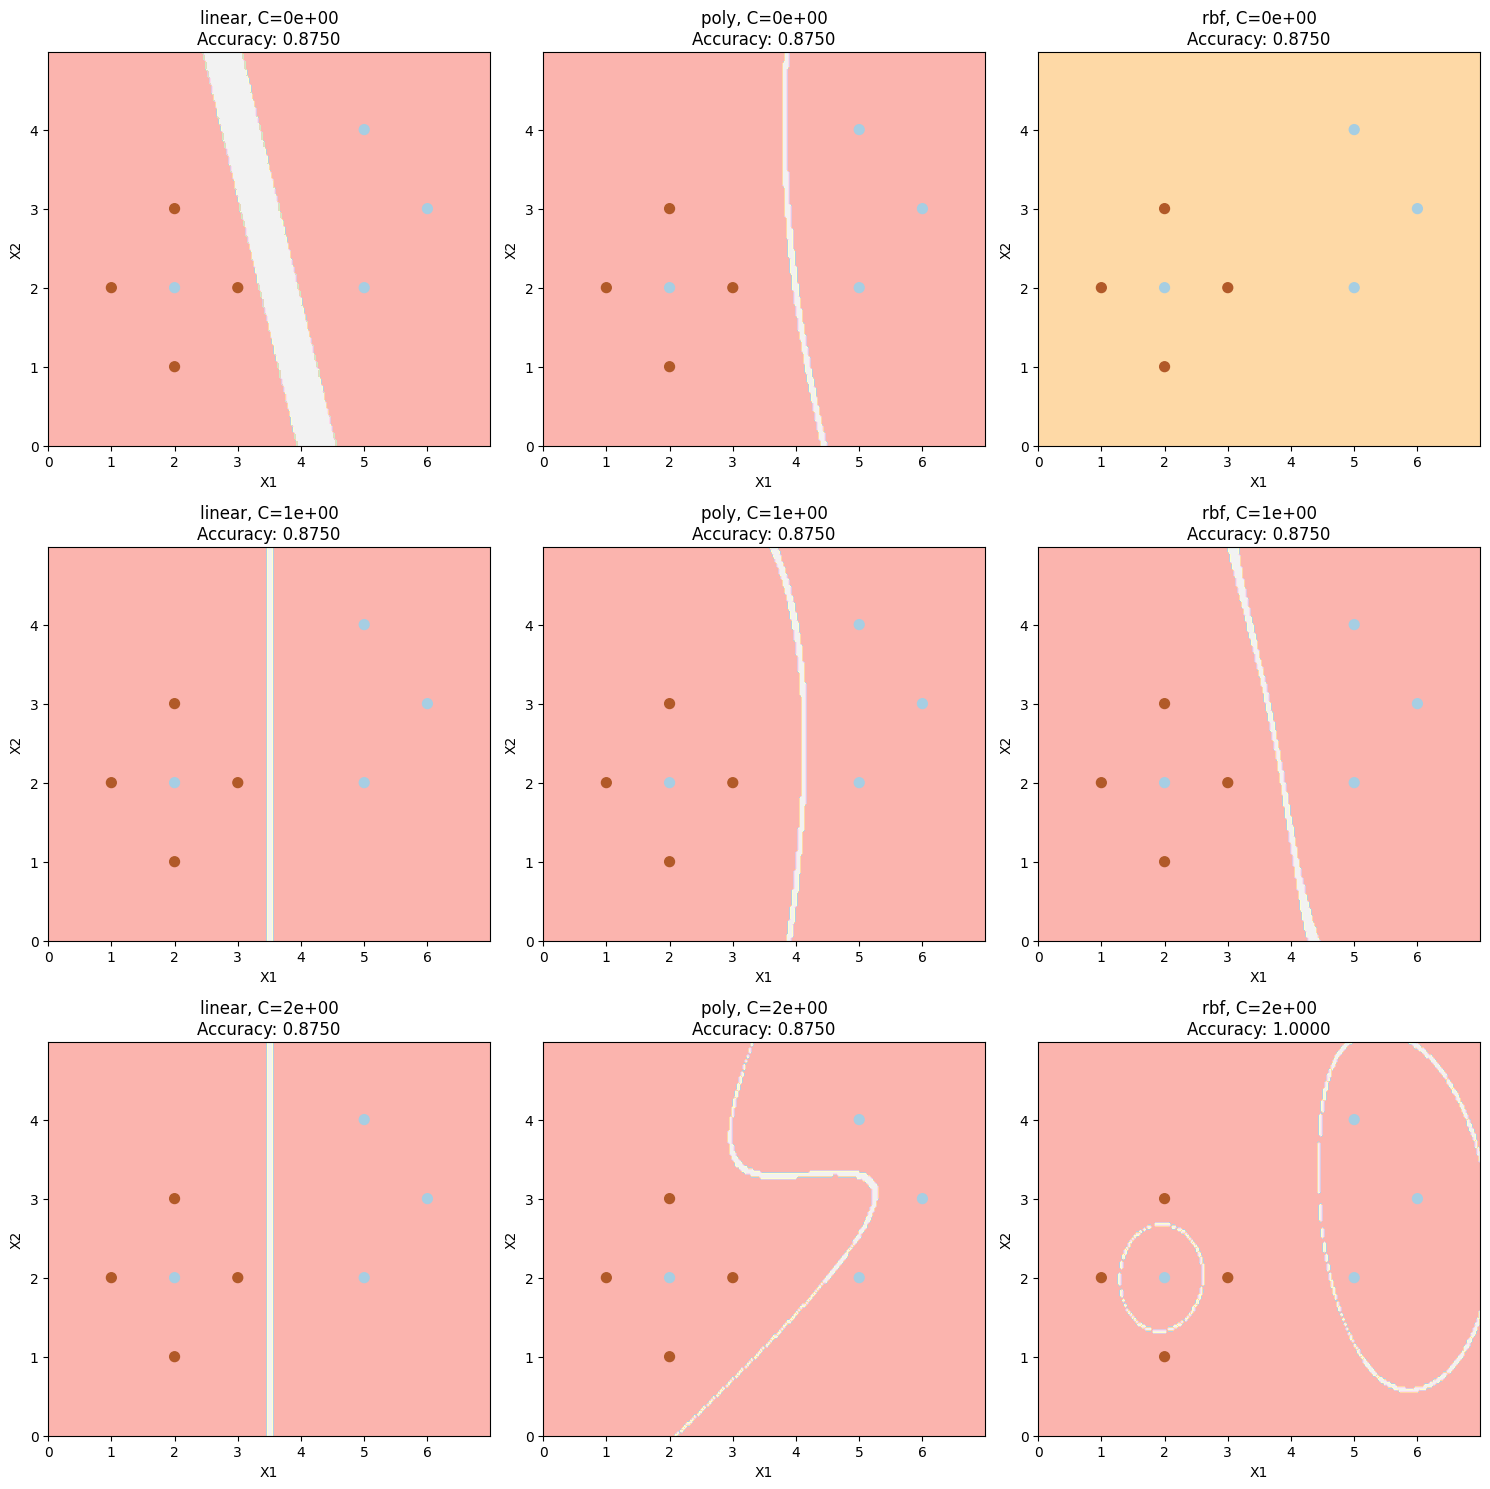

In [14]:
# Your code here...
C = [0.01, 1, 100]
kernels = ['linear', 'poly', 'rbf']
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, c_val in enumerate(C):
    for j, kernel in enumerate(kernels):
        plt.sca(axes[i, j])
        svc = SVC(kernel=kernel, C=c_val).fit(unsep_X, unsep_y)
        plot_2d_svc_problem(unsep_X, unsep_y, svc)
        acc = accuracy_score(unsep_y, svc.predict(unsep_X))
        axes[i, j].set_title(f'{kernel}, C={i:.0e}\nAccuracy: {acc:.4f}')
        axes[i, j].set_xlabel('X1')
        axes[i, j].set_ylabel('X2')
plt.tight_layout()
plt.show()



### 3. Optimization of the SVM's hyperparameters

Together with the hyperparameter $C$, SVM model with the RBF kernel function has an additional hyperparameter $\gamma=\frac{1}{2\sigma^2}$ (precision). This parameter also determines the model's complexity: a large value for $\gamma$ means that the RBF will be narrow, the examples will be mapped into a space where (according to the scalar product) they are very different from each other, which will result in more complex models. Conversely, a small value for $\gamma$ means that the RBF will be wide, the examples will be more similar to each other, resulting in simpler models. This also means that, if we choose a larger $\gamma$, we need to regularize the model more strongly, i.e. we need to choose a smaller $C$, in order to prevent overfitting. For this reason, it is necessary to jointly optimize the hyperparameters $C$ and $\gamma$, which is typically done by an exhaustive grid search. This approach is applied to all the models that contain more than one hyperparameter.

---

Pored hiperparametra $C$, model SVM s jezgrenom funkcijom RBF ima i dodatni hiperparametar $\gamma=\frac{1}{2\sigma^2}$ (preciznost). Taj parametar također određuje složenost modela: velika vrijednost za $\gamma$ znači da će RBF biti uska, primjeri će biti preslikani u prostor u kojem su (prema skalarnome produktu) međusobno vrlo različiti, što će rezultirati složenijim modelima. Obrnuto, mala vrijednost za $\gamma$ znači da će RBF biti široka, primjeri će biti međusobno sličniji, što će rezultirati jednostavnijim modelima. To ujedno znači da, ako odabremo veći $\gamma$, trebamo jače regularizirati model, tj. trebamo odabrati manji $C$, kako bismo spriječili prenaučenost. Zbog toga je potrebno zajednički optimirati hiperparametre $C$ i $\gamma$, što se tipično radi iscrpnim pretraživanjem po rešetci (engl. *grid search*). Ovakav pristup primjenjuje se kod svih modela koji sadrže više od jednog hiperparametra.

#### (a)

Define a function

> `grid_search(X_train, X_validate, y_train, y_validate, c_range=(c1,c2), g_range=(g1,g2), error_surface=False)`

which optimizes the parameters $C$ and $\gamma$ by grid search. The function should search over the hyperparameters $C\in\{2^{c_1},2^{c_1+1},\dots,2^{c_2}\}$ and $\gamma\in\{2^{g_1},2 ^{g_1+1},\dots,2^{g_2}\}$. The function should return the optimal hyperparameters $(C^*,\gamma^*)$, i.e., those for which the model obtained the smallest error on the validation set. Additionally, if `surface=True`, the function should return matrices (of type `ndarray`) of model errors (expectation of 0-1 loss) on the training set and the validation set. Each matrix is of dimension $(c_2-c_1+1)\times(g_2-g_1+1)$ (rows correspond to different values of $C$ and columns to different values of $\gamma$).

---

Definirajte funkciju 

> `grid_search(X_train, X_validate, y_train, y_validate, c_range=(c1,c2), g_range=(g1,g2), error_surface=False)` 

koja optimizira parametre $C$ i $\gamma$ pretraživanjem po rešetci. Funkcija treba pretražiti hiperparametre $C\in\{2^{c_1},2^{c_1+1},\dots,2^{c_2}\}$ i $\gamma\in\{2^{g_1},2^{g_1+1},\dots,2^{g_2}\}$. Funkcija treba vratiti optimalne hiperparametre $(C^*,\gamma^*)$, tj. one za koje na skupu za provjeru model ostvaruju najmanju pogrešku. Dodatno, ako je `surface=True`, funkcija treba vratiti matrice (tipa `ndarray`) pogreške modela (očekivanje gubitka 0-1) na skupu za učenje i skupu za provjeru. Svaka je matrica dimenzija $(c_2-c_1+1)\times(g_2-g_1+1)$ (retci odgovaraju različitim vrijednostima za $C$, a stupci različitim vrijednostima za $\gamma$).

In [ ]:
def grid_search(X_train, X_validate, y_train, y_validate, c_range=(0,5), g_range=(0,5), error_surface=False):
    #declare the optimal parameters 
    c_star, g_star = -1, -1
    error_min = float('inf')
    
    c1, c2 = c_range
    g1, g2 = g_range
    #compute the size of the matrix
    n_c = c2 - c1 + 1
    n_g = g2 - g1 + 1

    #declare matrixs full of -1 of the correct size
    train_errors = np.full((n_c, n_g), -1.0)
    validate_errors = np.full((n_c, n_g), -1.0)
    
    # iterate over models
    for i, c_exp in enumerate(range(c1, c2 + 1)):
        for j, g_exp in enumerate(range(g1, g2 + 1)):
            C_val = 2 ** c_exp
            gamma_val = 2 ** g_exp
            # train model with rbf kernel
            svc = SVC(kernel='rbf', C=C_val, gamma=gamma_val).fit(X_train, y_train)
            
            #zero-one loss
            train_error = 1 - accuracy_score(y_train, svc.predict(X_train))
            validate_error = 1 - accuracy_score(y_validate, svc.predict(X_validate))
            
            #put errors in matrix
            train_errors[i, j] = train_error
            validate_errors[i, j] = validate_error
            
            #check if hyperparameters are better
            if validate_error < error_min:
                error_min = validate_error
                c_star = c_exp
                g_star = g_exp
    
    # return matrix if error surface
    if error_surface:
        return c_star, g_star, train_errors, validate_errors
    else:
        return c_star, g_star

#### (b)

Using the [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function, generate **two** datasets of $N=200$ examples: one with $n=2$ dimensions and the other with $n=100$ dimensions. Let the examples come from two classes, with two groups corresponding to each class (`n_clusters_per_class=2`), so that the problem is a bit more complex, i.e. more non-linear. Keep all features informative. Divide the set of examples into a training set and a validation set in a 1:1 ratio.

Using the both sets, optimize the SVM with the kernel function RBF, in the grid $C\in\{2^{-5},2^{-4},\dots,2^{15}\}$ and $\gamma\in\{2^{-15},2^{-14},\dots,2^{3}\}$. Plot the error surface of the model on the training set and the validation set, on both data sets (four plots in total) and print the optimal combinations of hyperparameters. You can use the `mlutils.plot_error_surface` function to display the error surface of the model.

---

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte **dva** skupa podataka od $N=200$ primjera: jedan s $n=2$ dimenzije i drugi s $n=100$ dimenzija. Primjeri neka dolaze iz dviju klasa, s time da svakoj klasi odgovaraju dvije grupe (`n_clusters_per_class=2`), kako bi problem bio nešto složeniji, tj. nelinearniji. Neka sve značajke budu informativne. Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1.

Na oba skupa optimirajte SVM s jezgrenom funkcijom RBF, u rešetci $C\in\{2^{-5},2^{-4},\dots,2^{15}\}$ i $\gamma\in\{2^{-15},2^{-14},\dots,2^{3}\}$. Prikažite površinu pogreške modela na skupu za učenje i skupu za provjeru, i to na oba skupa podataka (ukupno četiri grafikona) te ispišite optimalne kombinacije hiperparametara. Za prikaz površine pogreške modela možete koristiti funkciju `mlutils.plot_error_surface`.

Optimal param : C* = 2^-4, γ* = 2^0
Optimal param : C* = 2^1, γ* = 2^-11


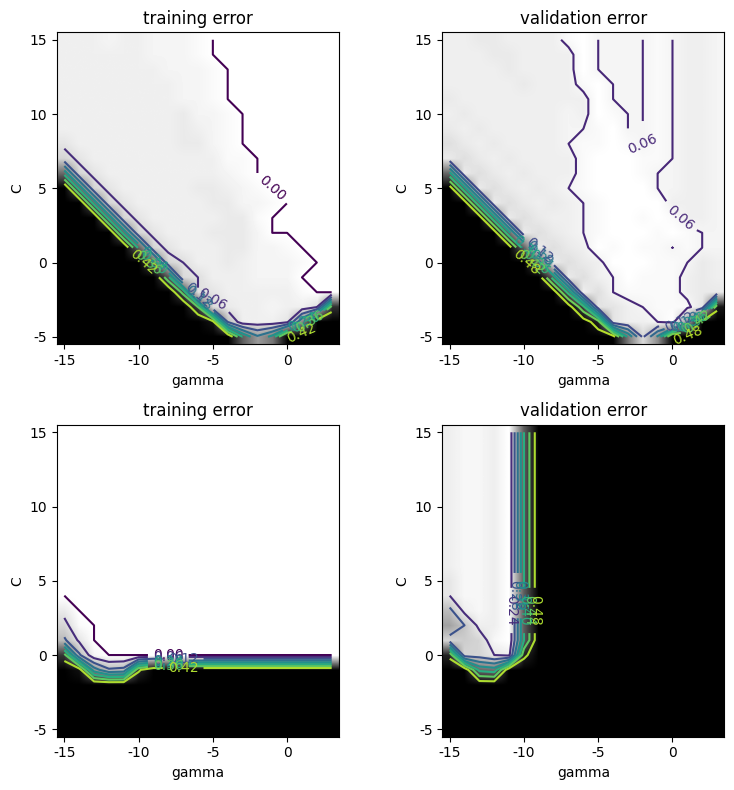

In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
#dataset 1 
X_2d, y_2d = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, n_classes=2)
#dataset 2 
X_100d, y_100d = make_classification(n_samples=200, n_features=100, n_informative=100, n_redundant=0, n_clusters_per_class=2, n_classes=2)
# 1:1 ratio for train and test
X_2d_train, X_2d_validate, y_2d_train, y_2d_validate = train_test_split(X_2d, y_2d, test_size=0.5, random_state=42)
X_100d_train, X_100d_validate, y_100d_train, y_100d_validate = train_test_split(X_100d, y_100d, test_size=0.5, random_state=42)
#ranges
c_range = (-5, 15)  
g_range = (-15, 3)  

#1
c_star_2d, g_star_2d, train_errors_2d, validate_errors_2d = grid_search(X_2d_train, X_2d_validate, y_2d_train, y_2d_validate, 
                                                                        c_range=c_range, g_range=g_range, error_surface=True)
print(f"Optimal param : C* = 2^{c_star_2d}, "f"γ* = 2^{g_star_2d}")
#2
c_star_100d, g_star_100d, train_errors_100d, validate_errors_100d = grid_search(X_100d_train, X_100d_validate, y_100d_train, y_100d_validate, 
                                                                                c_range=c_range, g_range=g_range, error_surface=True)
print(f"Optimal param : C* = 2^{c_star_100d}, "f"γ* = 2^{g_star_100d}")

#plot for subplot
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

#2d datasert training 
plt.sca(axes[0, 0])
plot_error_surface(train_errors_2d, c_range=c_range, g_range=g_range)
axes[0, 0].set_title('training error')

#2d dataset validation
plt.sca(axes[0, 1])
plot_error_surface(validate_errors_2d, c_range=c_range, g_range=g_range)
axes[0, 1].set_title('validation error')

#1OOd dataset training
plt.sca(axes[1, 0])
plot_error_surface(train_errors_100d, c_range=c_range, g_range=g_range)
axes[1, 0].set_title('training error')

#100d dataset validation 
plt.sca(axes[1, 1])
plot_error_surface(validate_errors_100d, c_range=c_range, g_range=g_range)
axes[1, 1].set_title('validation error')

plt.tight_layout()
plt.show()

**Q:** Is the error surface different on the training set and the test set? Why?  
**Q:** In the error surface plot, which part of the surface corresponds to overfitting and which part to underfitting? Why?  
**Q:** How does the number of dimensions $n$ affect the error surface, that is, the optimal hyperparameters $(C^*, \gamma^*)$?  
**Q:** It is recommended that an increase in the value of $\gamma$ should be accompanied by a decrease in the value of $C$. Do your results support that recommendation? Explain.

---

**Q:** Razlikuje li se površina pogreške na skupu za učenje i skupu za ispitivanje? Zašto?  
**Q:** U prikazu površine pogreške, koji dio površine odgovara prenaučenosti, a koji podnaučenosti? Zašto?  
**Q:** Kako broj dimenzija $n$ utječe na površinu pogreške, odnosno na optimalne hiperparametre $(C^*, \gamma^*)$?  
**Q:** Preporuka je da povećanje vrijednosti za $\gamma$ treba biti popraćeno smanjenjem vrijednosti za $C$. Govore li vaši rezultati u prilog toj preporuci? Obrazložite.  

### 4. The effect of feature standardization in SVM

From the lab assignment on the topic of regression, we know that the features of different scales can make it impossible to interpret the learned linear regression model. However, this problem occurs with many models, so it is almost always important to scale the features before training, in order to prevent features with larger numerical ranges from dominating those with smaller numerical ranges. This also applies to SVM, where scaling can often significantly improve results. The goal of this task is to experimentally determine the influence of feature scaling on SVM accuracy.

We will now generate a two-class set of $N=500$ examples with $n=2$ features, so that the dimension $x_1$ has a larger values and a larger range than the dimension $x_0$, and we will add one example whose feature value $x_1$ jumps from other examples:

---

Iz laboratorijske vježbe na temu regresije, sjećamo se da značajke različitih skala mogu onemogućiti interpretaciju naučenog modela linearne regresije. Međutim, ovaj problem javlja se kod mnogih modela pa je tako skoro uvijek bitno prije treniranja skalirati značajke, kako bi se spriječilo da značajke s većim numeričkim rasponima dominiraju nad onima s manjim numeričkim rasponima. To vrijedi i za SVM, kod kojega skaliranje nerijetko može znatno poboljšati rezultate. Svrha ovog zadataka jest eksperimentalno utvrditi utjecaj skaliranja značajki na točnost SVM-a.

Generirat ćemo dvoklasni skup od $N=500$ primjera s $n=2$ značajke, tako da je dimenzija $x_1$ većeg iznosa i većeg raspona od dimenzije $x_0$, te ćemo dodati jedan primjer koji vrijednošću značajke $x_1$ odskače od ostalih primjera:

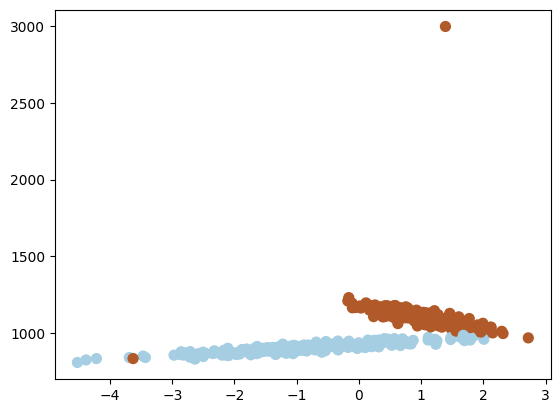

In [17]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1, random_state=69)
X[:,1] = X[:,1]*100+1000
X[0,1] = 3000
plot_2d_svc_problem(X, y)

#### (a)

Familiarize yourself with the histogram plotting function [`hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Display the histograms of the feature values $x_0$ and $x_1$ (use `bins=50` here and in the following tasks).

---

Proučite funkciju za iscrtavanje histograma [`hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ (ovdje i u sljedećim zadatcima koristite `bins=50`).

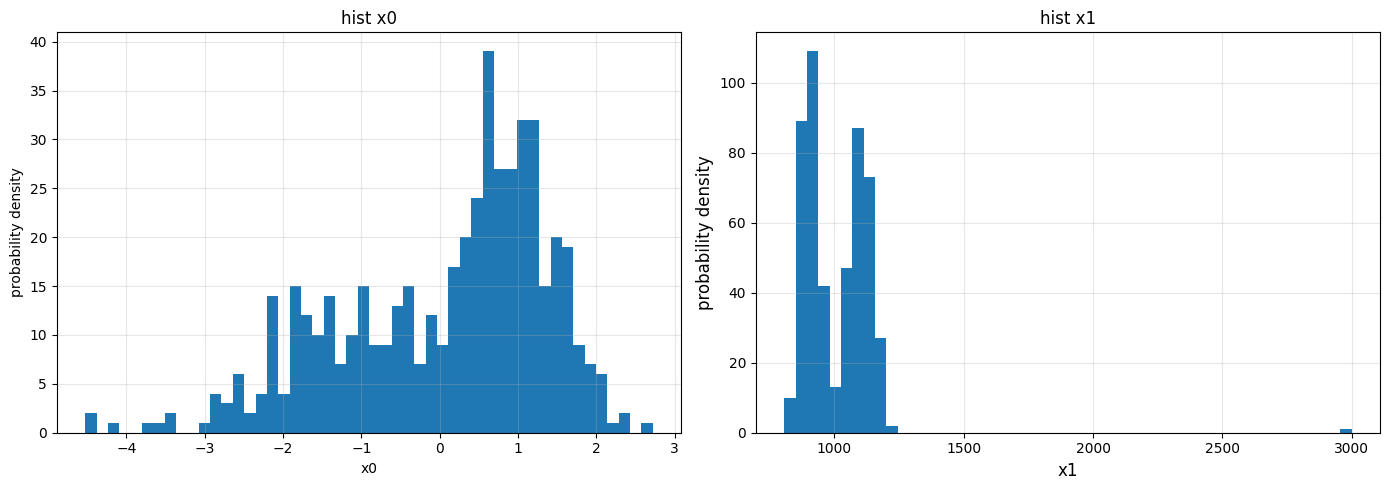

In [23]:
from sklearn.preprocessing import MinMaxScaler


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#feature x0
axes[0].hist(X[:, 0], bins=50)
axes[0].set_xlabel('x0')
axes[0].set_ylabel('probability density')
axes[0].set_title('hist x0')
axes[0].grid(True, alpha=0.3)

#feature x1
axes[1].hist(X[:, 1], bins=50)
axes[1].set_xlabel('x1', fontsize=12)
axes[1].set_ylabel('probability density', fontsize=12)
axes[1].set_title('hist x1')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### (b)

Take a look at the [`preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) class. Display histograms of feature values $x_0$ and $x_1$ if they are scaled by min-max scaling (two histograms in total).

---

Proučite razred [`preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane min-max skaliranjem (ukupno dva histograma).

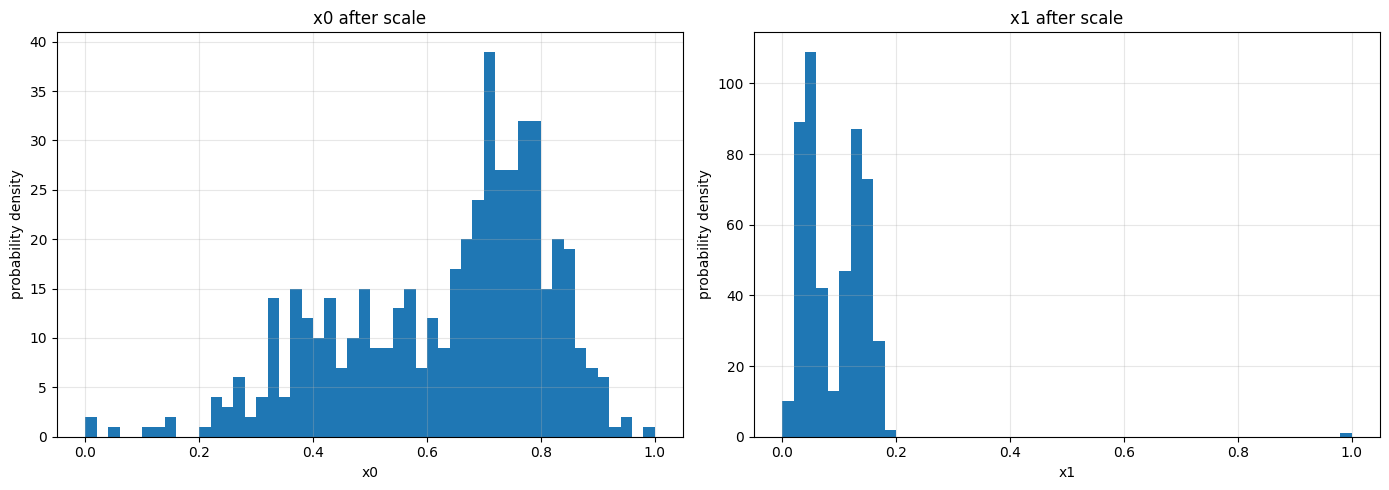

In [24]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#x0 scale
axes[0].hist(X_scaled[:, 0], bins=50)
axes[0].set_xlabel('x0')
axes[0].set_ylabel('probability density',)
axes[0].set_title('x0 after scale')
axes[0].grid(True, alpha=0.3)

#x1 scale
axes[1].hist(X_scaled[:, 1], bins=50)
axes[1].set_xlabel('x1')
axes[1].set_ylabel('probability density')
axes[1].set_title('x1 after scale')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Q:** How does this scaling work? <br>
**Q:** The resulting histograms are very similar. What's the difference? <br>

---

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (c)

Take a look at the [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class. Display the histograms of the feature values $x_0$ and $x_1$ if they are scaled by standard scaling (two histograms in total).

---

Proučite razred [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane standardnim skaliranjem (ukupno dva histograma).

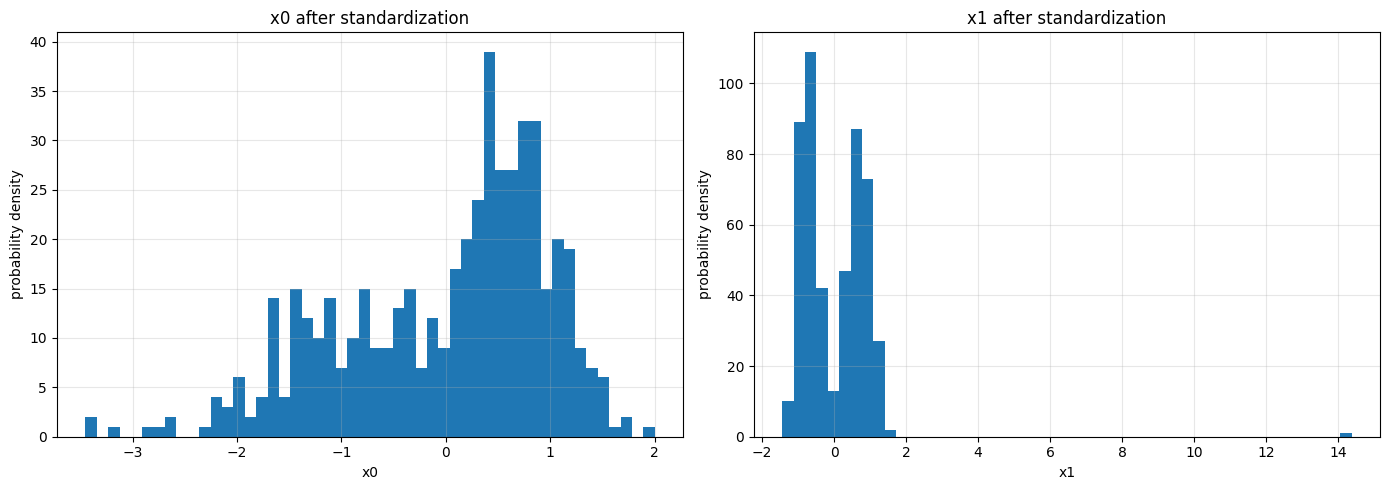

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#x0 standard
axes[0].hist(X_standard[:, 0], bins=50)
axes[0].set_xlabel('x0')
axes[0].set_ylabel('probability density',)
axes[0].set_title('x0 after standardization')
axes[0].grid(True, alpha=0.3)

#x1 standard
axes[1].hist(X_standard[:, 1], bins=50)
axes[1].set_xlabel('x1')
axes[1].set_ylabel('probability density')
axes[1].set_title('x1 after standardization')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Q:** How does this scaling work? <br>
**Q:** The resulting histograms are very similar. What's the difference? <br>

---

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (d)

Divide the set of examples into a training set and a test set in a 1:1 ratio. Train the SVM with the RBF kernel function on the training set and calculate the accuracy of the model on the test set, using three variants of the above set: unscaled features, standardized features, and min-max scaling. Use default values for $C$ and $\gamma$. Calculate the accuracy of each of the three models on the training set and the test set. Repeat the procedure several times (e.g. 30) and average the results (in each repetition generate the data as given at the beginning of this task).

**NB:** On the training set, the scaling parameters should first be calculated and then scaling should be applied (function `fit_transform`), while on the test set only scaling should be applied with the parameters obtained on the learning set (function `transform`).

---

Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1. Trenirajte SVM s jezgrenom funkcijom RBF na skupu za učenje i ispitajte točnost modela na skupu za ispitivanje, koristeći tri varijante gornjeg skupa: neskalirane značajke, standardizirane značajke i min-max skaliranje. Koristite podrazumijevane vrijednosti za $C$ i $\gamma$. Izmjerite točnost svakog od triju modela na skupu za učenje i skupu za ispitivanje. Ponovite postupak više puta (npr. 30) te uprosječite rezultate (u svakom ponavljanju generirajte podatke kao što je dano na početku ovog zadatka).

**NB:** Na skupu za učenje treba najprije izračunati parametre skaliranja te zatim primijeniti skaliranje (funkcija `fit_transform`), dok na skupu za ispitivanje treba samo primijeniti skaliranje s parametrima koji su dobiveni na skupu za učenje (funkcija `transform`).

In [28]:
scalers = {
    'unscale': None, 
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

train_accuracies = {name: [] for name in scalers.keys()}
test_accuracies = {name: [] for name in scalers.keys()}

for i in range(30):
    X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=i)
    X[:, 1] = X[:, 1] * 100 + 1000
    X[0, 1] = 3000
    
    #1:1 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i)
    
    #iterate over scalers
    for scaler_name, scaler in scalers.items():
        if scaler is None:
            X_train_scaled = X_train
            X_test_scaled = X_test
        else:
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        #train model
        svc = SVC(kernel='rbf').fit(X_train_scaled, y_train)
        
        #accuracies
        train_accuracies[scaler_name].append(accuracy_score(y_train, svc.predict(X_train_scaled)))
        test_accuracies[scaler_name].append(accuracy_score(y_test, svc.predict(X_test_scaled)))


# average accuracies
for scaler_name in scalers.keys():
    mean_train = np.mean(train_accuracies[scaler_name])
    mean_test = np.mean(test_accuracies[scaler_name])
    print(f"{scaler_name:} \nmean_train_acc {mean_train} \nmean_test_acc {mean_test}\n")


unscale 
mean_train_acc 0.706 
mean_test_acc 0.6813333333333333

StandardScaler 
mean_train_acc 0.9604000000000001 
mean_test_acc 0.9564

MinMaxScaler 
mean_train_acc 0.9545333333333333 
mean_test_acc 0.9514666666666667



**Q:** Are the results as expected? Explain. <br>
**Q:** Would it be ok if we applied the `fit_transform` function to the entire data set? Why? Would it be ok if we applied the function separately to the training set and separately to the test set? Why?

---

**Q:** Jesu li rezultati očekivani? Obrazložite. <br>
**Q:** Bi li bilo dobro kada bismo funkciju `fit_transform` primijenili na cijelom skupu podataka? Zašto? Bi li bilo dobro kada bismo tu funkciju primijenili zasebno na skupu za učenje i zasebno na skupu za ispitivanje? Zašto?

### 5. k-nearest neighbors algorithm

In this task, we will analyse a simple classification model called **k-nearest neighbor algorithm**. First, you will implement it independently to familiarize yourself with the inner workings of this model, and then you will move on to the analysis of its hyperparameters (using a built-in class, for efficiency).

---

U ovom zadatku promatrat ćemo jednostavan klasifikacijski model imena **algoritam k-najbližih susjeda**. Najprije ćete ga samostalno isprogramirati kako biste se detaljno upoznali s radom ovog modela, a zatim ćete prijeći na analizu njegovih hiperparametara (koristeći ugrađeni razred, radi efikasnosti).

#### (a)

Implement the `KNN` class, which implements the $k$-nearest neighbors algorithm. An optional parameter of the constructor is the number of neighbors `n_neighbors` ($k$), with the default value set to 3. Define the methods `fit(X, y)` and `predict(X)`, which are used for training the model and prediction, respectively. As a distance measure, use Euclidean distance ([`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html); watch out for the `axis` parameter). It is not necessary to implement any weighting function.

---

Implementirajte klasu `KNN`, koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda `n_neighbours` ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za učenje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html); pripazite na parametar `axis`). Nije potrebno implementirati nikakvu težinsku funkciju.

In [30]:
from numpy.linalg import norm

class KNN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None
                
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        predictions = []
        
        for x in X_test:
            #disy between x and all other examples
            distances = norm(self.X_train - x, axis=1)
            
            #indices of k nearest neighbor
            k_nearest_indices = np.argsort(distances)[:self.n_neighbors]
            
            #get labels form indices
            k_nearest_labels = self.y_train[k_nearest_indices]
            
            #predict
            unique, counts = np.unique(k_nearest_labels, return_counts=True)
            prediction = unique[np.argmax(counts)]
            predictions.append(prediction)
        
        return np.array(predictions)

#### (b)

To make sure your implementation is correct, compare it with the [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. Since the mentioned class uses various optimization tricks when finding the nearest neighbors, make sure to set the `algorithm=brute` parameter, otherwise your predictions may differ. Compare models on a given (artificial) dataset (recall how arrays are compared; [`numpy.all`](https://numpy.org/doc/stable/reference/generated/numpy.all.html)).

---

Kako biste se uvjerili da je Vaša implementacija ispravna, usporedite ju s onom u razredu [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Budući da spomenuti razred koristi razne optimizacijske trikove pri pronalasku najbližih susjeda, obavezno postavite parametar `algorithm=brute`, jer bi se u protivnom moglo dogoditi da vam se predikcije razlikuju. Usporedite modele na danom (umjetnom) skupu podataka (prisjetite se kako se uspoređuju polja; [`numpy.all`](https://numpy.org/doc/stable/reference/generated/numpy.all.html)).

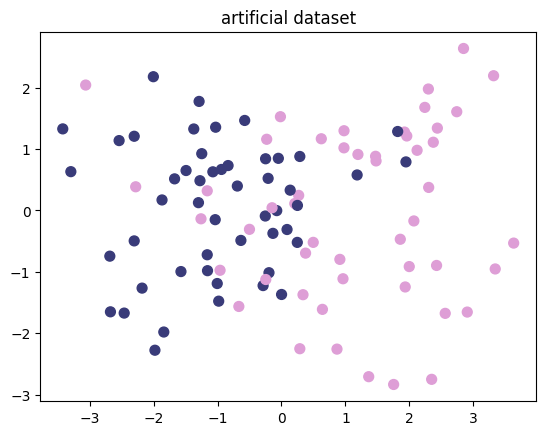

In [32]:
from sklearn.datasets import make_classification
X_art, y_art = make_classification(n_samples=100, n_features=2, n_classes=2, 
                                   n_redundant=0, n_clusters_per_class=2,
                                   random_state=69)
plot_2d_clf_problem(X_art, y_art)
plt.title('artificial dataset')
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
#70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_art, y_art, test_size=0.3, random_state=42)

#my knn
knn_custom = KNN(n_neighbors=3)
knn_custom.fit(X_train, y_train)
predictions_custom = knn_custom.predict(X_test)
    
#sklearn knn
knn_sklearn = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
knn_sklearn.fit(X_train, y_train)
predictions_sklearn = knn_sklearn.predict(X_test)

print(f"\nk = {3}:")
print(f"  Accuracy custom:  {accuracy_score(y_test, predictions_custom):.4f}")
print(f"  Accuracy sklearn: {accuracy_score(y_test, predictions_sklearn):.4f}")




k = 3:
  Accuracy custom:  0.7667
  Accuracy sklearn: 0.7667


### 6. The effect of the hyperparameter *k*

The k-nn algorithm has a hyperparameter $k$ (number of neighbors). This hyperparameter directly affects the complexity of the algorithm, so it is extremely important to choose its value correctly. As with many other algorithms, with the k-nn algorithm the optimal value of the hypermeter $k$ depends on the specific problem, including the number of examples $N$, the number of features (dimensions) $n$ and the number of classes $K$.

In order to obtain more reliable results, it is necessary to repeat some of the experiments on different data sets and then average the obtained error values. Use the function: `knn_eval` which trains and tests the k-nearest neighbors model on a total of `n_instances` of examples. For each value of the hyperparameter from the given interval `k_range` the function repeats `n_trials` measurements, generating for each measurement a new data set and dividing it into a training and a testing set. The test set ratio is defined by the `test_size` parameter. The return value of the function is a quadruple `(ks, best_k, train_errors, test_errors)`. The `best_k` value is the optimal value of the hyperparameter $k$ (the value for which the error on the test set is the smallest). The `train_errors` and `test_errors` values are lists of errors on the training set and the testing set for all considered values of the hyperparameter $k$, while `ks` stores all the considered values of the hyperparameter $k$.

---

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj hiperparametar izravno utječe na složenost algoritma, pa je stoga izrazito važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$. 

Kako bismo dobili pouzdanije rezultate, potrebno je neke od eksperimenata ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogrešaka. Koristite funkciju: `knn_eval` koja trenira i ispituje model k-najbližih susjeda na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući za svako od njih nov skup podataka i dijeleći ga na skup za učenje i skup za ispitivanje. Udio skupa za ispitivanje definiran je parametrom `test_size`. Povratna vrijednost funkcije jest četvorka `(ks, best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$, dok `ks` upravo pohranjuje sve razmatrane vrijednosti hiperparametra $k$.

#### (a)

Using the data from the task 5, use the function `plot_2d_clf_problem` to plot the example space and the areas corresponding to the first and second class. Repeat this for $k\in[1, 5, 20, 100]$.

**NB:** The implementation of the `KNeighborsClassifier` algorithm from the `scikit-learn` package will probably work faster than your implementation, so use it in the remaining experiments.

---

Na podatcima iz zadatka 5, pomoću funkcije `plot_2d_clf_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Ponovite ovo za $k\in[1, 5, 20, 100]$. 

**NB:** Implementacija algoritma `KNeighborsClassifier` iz paketa `scikit-learn` vjerojatno će raditi brže od Vaše implementacije, pa u preostalim eksperimentima koristite nju.

In [ ]:
# Your code here...

**Q:** How does $k$ affect the border between the classes?  
**Q:** How does the algorithm behave in extreme situations: $k=1$ and $k=100$?

---

**Q:** Kako $k$ utječe na izgled granice između klasa?  
**Q:** Kako se algoritam ponaša u ekstremnim situacijama: $k=1$ i $k=100$?

#### (b)

Using the `knn_eval` function, plot the training and testing errors as a function of the hyperparameter $k\in\{1,\dots,20\}$, for $N=\{100, 250, 750\}$ examples. Make 3 separate graphs. For each graph, print the optimal value of the hyperparameter $k$ (easiest as a plot title; see [`plt.title`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.title.html)).

---

Pomoću funkcije `knn_eval`, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k\in\{1,\dots,20\}$, za $N=\{100, 250, 750\}$ primjera. Načinite 3 zasebna grafikona. Za svaki ispišite optimalnu vrijednost hiperparametra $k$ (najlakše kao naslov grafikona; vidi [`plt.title`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.title.html)).

In [ ]:
# Your code here...

**Q:** How does the optimal value of the hyperparameter $k$ change with respect to the number of examples $N$? Why?  
**Q:** Which area of the graph corresponds to overfitting and which to underfitting? Why?  
**Q:** Is it always possible to reach an error of 0 on the training set?

---

**Q:** Kako se mijenja optimalna vrijednost hiperparametra $k$ s obzirom na broj primjera $N$? Zašto?  
**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto?  
**Q:** Je li uvijek moguće doseći pogrešku od 0 na skupu za učenje?

### 7. Irrelevant features

We'd like to check to what extent the k-nearest neighbors algorithm is sensitive to the presence of irrelevant features. In order to do so, we can use the function [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification .html) to generate a set of examples in which some of the features are irrelevant. Namely, the parameter `n_informative` determines the number of essential features, while the parameter `n_features` determines the total number of features. If `n_features > n_informative`, then some of the features will be irrelevant. Instead of using the `make_classification` function directly, we will use the `knn_eval` function, which only takes these parameters but allows us to make more reliable estimates.

Use the `mlutils.knn_eval` function in two ways. In both ways, use $N=1000$ examples, $n=10$ features, and $K=5$ classes, but for the first let all 10 features be informative, and for the second let only 5 out of 10 features be informative. Print the training and testing errors for both models for the optimal value of $k$ (the value for which the testing error is the smallest).

---

Kako bismo provjerili u kojoj je mjeri algoritam k-najbližih susjeda osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval`, koja samo preuzime ove parametre, ali nam omogućuje pouzdanije procjene.

Koristite funkciju `mlutils.knn_eval` na dva načina. U oba koristite $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

In [ ]:
# Your code here...

**Q:** Is the k-nearest neighbor algorithm sensitive to irrelevant features? Why?  
**Q:** Is this problem present in other models that we have worked with so far (e.g., logistic regression)?  
**Q:** How would a k-nearest neighbor model perform on a dataset with features of different scales? Please explain in detail.

---

**Q:** Je li algoritam k-najbližih susjeda osjetljiv na nebitne značajke? Zašto?  
**Q:** Je li ovaj problem izražen i kod ostalih modela koje smo dosad radili (npr. logistička regresija)?  
**Q:** Kako bi se model k-najbližih susjeda ponašao na skupu podataka sa značajkama različitih skala? Detaljno pojasnite.

### 8. "Curse of dimensionality"

The "curse of dimensionality" refers to a number of phenomena associated with high-dimensional spaces. In most cases, these phenomena, which are mostly counterintuitive, lead to the decrease of the model's accuracy as the number of dimensions (features) grows.

---

"Prokletstvo dimenzionalnosti" zbirni je naziv za niz fenomena povezanih s visokodimenzijskim prostorima. Ti fenomeni, koji se uglavnom protive našoj intuiciji, u većini slučajeva dovode do toga da se s porastom broja dimenzija (značajki) smanjenje točnost modela.

In general, the increase in the number of dimensions makes all the points in the input space become (in terms of Euclidean distance) increasingly distant from each other and, consequently, the differences in distances between the points are lost. We will experimentally verify that this is indeed the case. Study the function [`metrics.pairwise_distances`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Generate 100 random vectors in different dimensions $n\in[1,2,\ldots,50]$ and calculate the *average* Euclidean distance between all the pairs of these vectors. To generate random vectors, use the function [`numpy.random.random`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html). On the same graph, plot the curve for average cosine distances (change the value of the `metric` parameter).

---

Općenito, povećanje dimenzija dovodi do toga da sve točke u ulaznome prostoru postaju (u smislu euklidske udaljenosti) sve udaljenije jedne od drugih te se, posljedično, gube razlike u udaljenostima između točaka. Eksperimentalno ćemo provjeriti da je to doista slučaj. Proučite funkciju [`metrics.pairwise_distances`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Generirajte 100 slučajnih vektora u različitim dimenzijama $n\in[1,2,\ldots,50]$ dimenzija te izračunajte *prosječnu* euklidsku udaljenost između svih parova tih vektora. Za generiranje slučajnih vektora koristite funkciju [`numpy.random.random`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html). Na istom grafu skicirajte i krivulju za prosječne kosinusne udaljenosti (parametar `metric`).

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Your code here...

**Q:** Try to explain the differences in results. Which of these two measures would you use to classify high-dimensional data?  
**Q:** Why is this problem particularly pronounced with the k-nearest neighbor algorithm?

---

**Q:** Pokušajte objasniti razlike u rezultatima. Koju biste od ovih dviju mjera koristili za klasifikaciju visokodimenzijskih podataka?  
**Q:** Zašto je ovaj problem osobito izražen kod algoritma k-najbližih susjeda?